# Data Wrangling 

By Babatunji Ogunjobi

In [1]:
# Import the libraries needed for this project
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
import math
import time
import matplotlib.pyplot as plt
from IPython.display import HTML

# Gathering the Data

#### 1) WeRateDogs Twitter Archive

In [2]:
# Import WeRateDogs twitter archive file from csv file and create Pandas dataframe from csv file.
ted_df = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
# Exploration of data in file
ted_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Exploring data types to detect missing data.
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob


#### 2) Image predictions for tweets

In [5]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
#check the contents of the request
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [7]:
# Import the tweet image predictions TSV file into a DataFrame
img_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [8]:
# Exploration of data in file
img_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
# Exploration of data types and missing fields.
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 3) Analyzing with the Twitter API 

In [10]:
# Declare Twitter API keys and access tokens
consumer_token = 'Consumer Token'
consumer_secret = 'Consumer Secret'
access_token = 'access token'
access_secret = 'access secret'

In [11]:
# Create OAuthHandler instance
auth = tweepy.OAuthHandler(consumer_token,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [12]:
# Create list of tweet ids
tweet_id = ted_df['tweet_id']
list(tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [13]:
#Investigate first tweet to find out information available.
tweet = api.get_status(tweet_id[0])
tweet

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'sizes': {'large': {'h': 528, 'resize': 'fit', 'w': 540},
     'medium': {'h': 528, 'resize': 'fit', 'w': 540},
     'small': {'h': 528, 'resize': 'fit', 'w': 540},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/MgUWQ76dJU'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/ph

In [14]:
# Iterate over tweet_ids to obtain favorites and retweet count and then append these into df_list.
df_list = []

# Check for tweet_ids and append any not found by API,to e_list
e_list = []

for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception as e:
        e_list.append(id)
        

892420643555336193 37627 8203
892177421306343426 32336 6068
891815181378084864 24360 4011
891689557279858688 40953 8365
891327558926688256 39153 9056
891087950875897856 19692 3008
890971913173991426 11513 1988
890729181411237888 63490 18226
890609185150312448 27077 4128
890240255349198849 31027 7125
890006608113172480 29849 7084
889880896479866881 27054 4813
889665388333682689 46782 9701
889638837579907072 26373 4381
889531135344209921 14710 2175
889278841981685760 24563 5198
888917238123831296 28335 4351
888804989199671297 24853 4134
888554962724278272 19288 3420
888078434458587136 21175 3369
887705289381826560 29384 5200
887517139158093824 45031 11310
887473957103951883 67049 17550
887343217045368832 32761 10075
887101392804085760 29748 5760
886983233522544640 34167 7508
886736880519319552 11714 3155
886680336477933568 21840 4316
886366144734445568 20608 3096
886267009285017600 116 4
886258384151887873 27240 6095
886054160059072513 0 105
885984800019947520 31717 6552
8855289432054702

838150277551247360 1745 353
838085839343206401 147 1
838083903487373313 18274 3339
837820167694528512 35466 8305
837482249356513284 3984 466
837471256429613056 13264 2415
837366284874571778 21966 5616
837110210464448512 16637 2528
836989968035819520 13196 2431
836753516572119041 20005 4886
836677758902222849 13109 2353
836648853927522308 0 577
836397794269200385 0 29337
836380477523124226 15325 3147
836260088725786625 22104 4539
836001077879255040 19845 4542
835685285446955009 0 8644
835574547218894849 18513 3838
835536468978302976 0 1806
835309094223372289 0 22294
835297930240217089 17084 3183
835264098648616962 8034 1806
835246439529840640 2177 77
835172783151792128 27183 6091
835152434251116546 23356 3202
834931633769889797 11250 1751
834786237630337024 22056 5839
834574053763584002 14230 2686
834477809192075265 0 11340
834458053273591808 10007 1784
834209720923721728 21444 5082
834167344700198914 16408 3868
834089966724603904 10462 2258
834086379323871233 13605 2358
833863086058651

800751577355128832 11139 3005
800513324630806528 13935 3271
800459316964663297 10045 2339
800443802682937345 0 4677
800388270626521089 11823 3047
800188575492947969 0 4283
800141422401830912 16247 2781
800018252395122689 30090 14283
799774291445383169 0 5073
799757965289017345 8899 2347
799422933579902976 8542 2076
799308762079035393 0 5977
799297110730567681 10497 3003
799063482566066176 8559 2673
798933969379225600 13929 4852
798925684722855936 7899 1549
798705661114773508 0 7156
798701998996647937 0 8449
798697898615730177 0 7047
798694562394996736 0 5375
798686750113755136 0 2514
798682547630837760 0 5113
798673117451325440 0 6013
798665375516884993 0 4231
798644042770751489 0 2008
798628517273620480 0 2130
798585098161549313 0 6190
798576900688019456 0 6345
798340744599797760 0 3640
798209839306514432 11005 2770
797971864723324932 12354 3412
797545162159308800 15400 5264
797236660651966464 21182 7211
797165961484890113 243 29
796904159865868288 0 9639
796865951799083009 8134 2066


762035686371364864 33484 16695
761976711479193600 5661 2160
761750502866649088 0 4199
761745352076779520 4460 921
761672994376806400 51931 31031
761599872357261312 4331 1257
761371037149827077 0 19201
761334018830917632 5451 1548
761292947749015552 4676 1171
761227390836215808 5569 1661
761004547850530816 11857 3708
760893934457552897 4001 1037
760656994973933572 6929 2054
760641137271070720 5200 1378
760539183865880579 7934 3885
760521673607086080 4428 1492
760290219849637889 28083 12263
760252756032651264 4122 925
760190180481531904 5965 1934
760153949710192640 0 33
759943073749200896 6217 2230
759923798737051648 15354 6033
759846353224826880 7024 2117
759793422261743616 6243 2028
759566828574212096 0 22558
759557299618865152 4917 1251
759447681597108224 8886 2600
759446261539934208 1750 517
759197388317847553 6342 2076
759159934323924993 0 1236
759099523532779520 15204 4448
759047813560868866 6812 2159
758854675097526272 3720 955
758828659922702336 11686 4081
758740312047005698 5992

725786712245440512 4293 1426
725729321944506368 5360 1876
725458796924002305 1454 653
724983749226668032 3835 1369
724771698126512129 2451 673
724405726123311104 5470 1722
724049859469295616 4462 1852
724046343203856385 2747 590
724004602748780546 4318 1644
723912936180330496 4025 1289
723688335806480385 7936 3120
723673163800948736 3123 934
723179728551723008 5462 1965
722974582966214656 4227 1643
722613351520608256 5127 1720
721503162398597120 4799 1964
721001180231503872 2615 644
720785406564900865 3217 803
720775346191278080 2565 709
720415127506415616 4268 1574
720389942216527872 6595 2631
720340705894408192 2959 1024
720059472081784833 4010 1174
720043174954147842 5069 2099
719991154352222208 4985 1829
719704490224398336 4704 1514
719551379208073216 5217 2024
719367763014393856 2874 775
719339463458033665 4550 1306
719332531645071360 3531 1000
718971898235854848 3602 1146
718939241951195136 5402 1846
718631497683582976 19478 8449
718613305783398402 2514 502
718540630683709445 254

Rate limit reached. Sleeping for: 17


706538006853918722 3582 1484
706516534877929472 3206 1082
706346369204748288 3569 968
706310011488698368 22084 8388
706291001778950144 1762 490
706265994973601792 2831 966
706169069255446529 4036 2341
706166467411222528 5321 1683
706153300320784384 1535 401
705975130514706432 3214 770
705970349788291072 3246 930
705898680587526145 2452 582
705786532653883392 2011 549
705591895322394625 3285 1212
705475953783398401 3053 964
705442520700944385 4599 1719
705428427625635840 3945 1767
705239209544720384 3106 780
705223444686888960 2666 841
705102439679201280 2230 536
705066031337840642 2250 634
704871453724954624 4421 1166
704859558691414016 2334 571
704847917308362754 5278 1610
704819833553219584 2737 1041
704761120771465216 6867 3040
704499785726889984 3036 1048
704491224099647488 791 84
704480331685040129 3520 1109
704364645503647744 8293 3730
704347321748819968 1650 363
704134088924532736 1560 492
704113298707505153 1920 590
704054845121142784 3024 951
703774238772166656 1905 487
703769

685663452032069632 3379 1539
685641971164143616 3042 825
685547936038666240 34197 16578
685532292383666176 3152 1215
685325112850124800 9834 4199
685321586178670592 2750 680
685315239903100929 3474 1142
685307451701334016 2151 465
685268753634967552 3218 1271
685198997565345792 2423 701
685169283572338688 4246 1500
684969860808454144 2460 397
684959798585110529 7065 3302
684940049151070208 3341 1100
684926975086034944 3634 490
684914660081053696 3647 1547
684902183876321280 1954 558
684880619965411328 2183 867
684830982659280897 36337 22805
684800227459624960 2823 1055
684594889858887680 9251 3725
684588130326986752 4266 1481
684567543613382656 3128 1297
684538444857667585 2739 1007
684481074559381504 4028 1233
684460069371654144 2063 585
684241637099323392 8460 3501
684225744407494656 1281 223
684222868335505415 3977 1450
684200372118904832 2245 1082
684195085588783105 1988 546
684188786104872960 3611 1243
684177701129875456 2093 709
684147889187209216 3091 1573
684122891630342144 207

674742531037511680 495 52
674739953134403584 1127 404
674737130913071104 658 96
674690135443775488 1162 482
674670581682434048 1633 671
674664755118911488 938 262
674646392044941312 1452 508
674644256330530816 1038 277
674638615994089473 1703 596
674632714662858753 1522 597
674606911342424069 946 102
674468880899788800 6300 2117
674447403907457024 1079 364
674436901579923456 1122 404
674422304705744896 1451 551
674416750885273600 689 144
674410619106390016 1216 478
674394782723014656 1517 590
674372068062928900 854 322
674330906434379776 566 76
674318007229923329 1434 528
674307341513269249 11443 7144
674291837063053312 14895 6046
674271431610523648 1588 749
674269164442398721 913 231
674265582246694913 1664 875
674262580978937856 1317 464
674255168825880576 1482 570
674082852460433408 761 174
674075285688614912 992 297
674063288070742018 6438 2262
674053186244734976 3355 1331
674051556661161984 1458 496
674045139690631169 1433 654
674042553264685056 732 132
674038233588723717 1113 423

In [71]:
# Analyze first 5 tweets to ensure iteration has worked correctly
df_list[:5]

[{'favorites': 37627, 'retweet_count': 8203, 'tweet_id': 892420643555336193},
 {'favorites': 32336, 'retweet_count': 6068, 'tweet_id': 892177421306343426},
 {'favorites': 24360, 'retweet_count': 4011, 'tweet_id': 891815181378084864},
 {'favorites': 40953, 'retweet_count': 8365, 'tweet_id': 891689557279858688},
 {'favorites': 39153, 'retweet_count': 9056, 'tweet_id': 891327558926688256}]

In [136]:
# View list of exceptions
e_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288,
 669993076832759809,
 669972011175813120,
 669970042633789440,
 669942763794931712,
 669926384437997569,
 669923323644657664,
 669753178989142016,
 669749430875258880,
 669684865554620416,
 669683899023405056,
 669682095984410625,
 669680153564442624,
 669661792646373376,
 669625907762618368,
 669603084620980224,
 669597912108789760,
 669583744538451968,
 669573570759163904,
 669571471778410496,
 669567591774625800,
 669564461267722241,
 669393256313184256,
 669375718304980992,
 669371483794317312,
 669367896104181761,
 669363888236994561,
 669359674819481600,
 669354382627049472,
 669353438988

In [137]:
# Try re-iterating for tweet_ids in exception list to see if there was an error during the first ieration   
ee_list = []

for e in e_list:
    try:
        page = api.get_status(e, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        
        df_list.append({'tweet_id': int(e),
                        'favorites': int(favorites),
                        'retweet_count': int(retweets)
                        })
        
    except Exception:
        ee_list.append(e)
       

In [138]:
# View list of exceptions again. The assumption is that these tweets are no longer available to get from the API.
ee_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288,
 669993076832759809,
 669972011175813120,
 669970042633789440,
 669942763794931712,
 669926384437997569,
 669923323644657664,
 669753178989142016,
 669749430875258880,
 669684865554620416,
 669683899023405056,
 669682095984410625,
 669680153564442624,
 669661792646373376,
 669625907762618368,
 669603084620980224,
 669597912108789760,
 669583744538451968,
 669573570759163904,
 669571471778410496,
 669567591774625800,
 669564461267722241,
 669393256313184256,
 669375718304980992,
 669371483794317312,
 669367896104181761,
 669363888236994561,
 669359674819481600,
 669354382627049472,
 669353438988

In [141]:
# With the data collected, create a pandas dataframe
tweetstatus_df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])

In [142]:
# Save a copy of the data to a txt file for future reference
tweetstatus_df.to_csv('tweet_json.txt',encoding='utf-8',index=False)

In [143]:
# Create a csv file in order to download and open without issues in Excel for visual inspection
tweetstatus_df.to_csv('tweet_json.csv',encoding='utf-8',index=False)

In [144]:
tweetstatus_df.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,37627,8203
1,892177421306343426,32336,6068
2,891815181378084864,24360,4011
3,891689557279858688,40953,8365
4,891327558926688256,39153,9056


In [145]:
tweetstatus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 3 columns):
tweet_id         2122 non-null int64
favorites        2122 non-null int64
retweet_count    2122 non-null int64
dtypes: int64(3)
memory usage: 49.8 KB


## Assessing Data

Three dataframes:
 * `tweetstatus_df` which has retweet and favorite counts
 * `img_predictions_df` has the results of a neural network trying to identify dog breed in a tweet's picture
 * `ted_df` has the tweet's text, rating, and dog category

 #### Visually with Excel and Pandas    

I was able to analyze the datasets in pandas with df.head() and df.info() in order to understand them.

Apart from doing this, i downloaded the the csv files for each dataset and analyzed using excel. I noticed that the dataset which had about 2500 rows could be analyzed in Excel using the filters function. This allowed me to atleast understand the data inside each of the three datasets leveraging excel. Through excel, i was able to identify that some of the dogs did not have the correct information filled within the name column and ratings had some numerator outliers like "84" which is totally an anomaly from the typical numbers noticed when i read an article on how weratedogs does their ratings. Also, some denominator ratings deviated form the stndard "10" whch we-rate-dogs uses.


#### Programmatically   

I was able to achieve this in pandas using df.info(), df.head()

### Some issues noticed for cleaning

Quality (completeness, validity, accuracy, and consistency issues)


* ted_df has 2356 rows while the "img_predictions_df" has only 2075 rows, maybe due to retweets and missing photos.
* ted_df contains 181 retweets and 78 replies which are not needed.
* incorrect dog names exist (a, an, the, just, one, very, quite, not, actually, mad, space, infuriating, all, officially, 0, old, life, unacceptable, my, incredibly, by, his, such)
* Outlier & unexpected values in rating_denominator (`ted_df`)  
* Outlier & unexpected values in rating_numerator  (`ted_df`)
* missing retweet and favorite data for 5 tweets (`tweetstatus_df`)
* missing img predictions for some tweets (`img_predictions_df`)
* unnecessary html tags in *source* column in place of utility name e.g. `<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>`
* The missing retweet and favorite data is unrecoverable. There is no status data available from the Twitter API and not all tweets have an image. I was unable to confirm that all tweets with an image stored the image.

Tidiness(structural issues)

* `retweets` and `favorites`  are in their own table (`tweetstatus_df`)
* dog stages (doggo, floffer, pupper, and puppo) in multiple columns. This can be combined into one column (`ted_df`)
* dog breeds in three different columns(`img_predictions_df`)

Validity

_archive_
* `tweet_id` is int
* `timestamp` is str
* `in_reply_to_status_id` is float
* `in_reply_to_user_id` is float
* `retweeted_status_id` is float
* `retweeted_status_user_id` is float
* `retweeted_status_timestamp` is str
* `dog stages are str`
* `text` is cut off with ellipses

_img predictions_
* `tweet_id` is int in `img_predictions_df` 

_tweets_
* retweets and favorites are float

Consistency

* meaningful but inconsistent numerators and denominators (`ted_df`)


In [146]:
tweetstatus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 3 columns):
tweet_id         2122 non-null int64
favorites        2122 non-null int64
retweet_count    2122 non-null int64
dtypes: int64(3)
memory usage: 49.8 KB


In [147]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [148]:
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [149]:
img_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [150]:
ted_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [151]:
tweetstatus_df.describe()

,tweet_id,favorites,retweet_count
count,2.122000e+03,2122.000000,2122.000000
mean,7.495850e+17,8545.590481,3129.523091
std,6.719135e+16,12529.829936,5030.544121
min,6.700031e+17,0.000000,1.000000
25%,6.855714e+17,1914.500000,720.000000
50%,7.393619e+17,3931.500000,1572.500000
75%,8.059064e+17,10685.750000,3607.750000
max,8.924206e+17,162517.000000,82658.000000


In [152]:
ted_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [153]:
ted_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [154]:
ted_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Koda          6
Dave          6
Leo           6
Stanley       6
Rusty         6
Jax           6
Milo          6
Oscar         6
Scout         6
Jack          6
Bella         6
Gus           5
Phil          5
Sunny         5
Larry         5
Louis         5
Finn          5
George        5
very          5
           ... 
Geoff         1
Geno          1
Blue          1
Aja           1
Timmy         1
Zuzu          1
Beebop        1
Beya          1
Lenox         1
Hero          1
Jomathan      1
Pancake       1
Pherb         1
Orion         1
Steve         1
Kota          1
Comet         1
Mark          1
Izzy          1
Chesney       1
Dallas        1
Jameson       1
Ito           1
Luther        1
Zooey   

In [155]:
ted_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Cleaning the Data

In [156]:
# Create a copy of the original 3 datasets for reference
ted_clean = ted_df.copy()
img_clean = img_predictions_df.copy()
tweet_clean = tweetstatus_df.copy()


In [157]:
# Save a copy of the clean datasets to work with
ted_clean.to_csv('ted_clean.csv',encoding='utf-8',index=False)
img_clean.to_csv('img_clean.csv',encoding='utf-8',index=False)
tweet_clean.to_csv('tweet_clean.csv',encoding='utf-8',index=False)

In [158]:
# Load clean datasets
ted_clean = pd.read_csv('ted_clean.csv')
img_clean = pd.read_csv('img_clean.csv')
tweet_clean = pd.read_csv('tweet_clean.csv')

In [159]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [160]:
#**Code:** Convert `tweet_id` in `ted_clean` to string. 

ted_clean.tweet_id = ted_clean.tweet_id.astype(str)
img_clean.tweet_id = img_clean.tweet_id.astype(str)


#### 1) Merge the 3 dataframes into 1 master dataframe

In [161]:
# Merge the three dataframes into one master DataFrame, starting first with ted_clean and tweet_clean
first_ted_master_df = pd.merge(ted_clean, tweet_clean, on=['tweet_id','tweet_id'],how='left') 

In [162]:
# Check if merge went as anticipated
first_ted_master_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN,NaN


In [163]:
# Merge new master with img_clean
first_ted_master_df = pd.merge(first_ted_master_df, img_clean, on='tweet_id',how='left') 

In [164]:
# Increase number of visible columns in a pandas DataFrame to see all the columns in the newly created master_df
pd.set_option("display.max_columns",30)

In [165]:
# Check merge went as anticipated
first_ted_master_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [166]:
# Check first_ted_master_df
first_ted_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
favorites                     0

In [167]:
# Save a copy of the newly created master dataframe as a starting point for cleaning
first_ted_master_df.to_csv('first_ted_master.csv',encoding='utf-8',index=False)

In [168]:
df = pd.read_csv('first_ted_master.csv')

#### 2)  Remove Retweets and Replies

In [169]:
# There are 181 retweets which can be seen in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and 
# "retweeted_status_timestamp". We keep the rows that are null and remove the retweets.
df = df[df.retweeted_status_id.isnull()]

In [170]:
# check that retweets have been removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
favorites                     0 non-nu

In [171]:
# delete the columns related to retweets from the master dataframe.
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [172]:
# check that the retweet columns have been expunged.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
favorites                0 non-null float64
retweet_count            0 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  19

In [173]:
# View the state of the dataframe
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [174]:
# the "in_reply_to_status_id" includes the original tweet_id if there is a reply. There are 78 replies.
# We keep the rows that are null and remove the replies.
df = df[df.in_reply_to_status_id.isnull()]

In [175]:
# check to ensure that reply related tweets have been deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null object
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     2097 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
favorites                0 non-null float64
retweet_count            0 non-null float64
jpg_url                  1971 non-null object
img_num                  1971 non-null float64
p1                       1971 non-null object
p1_conf                  1971

In [176]:
# delete the columns related to replies from the master dataframe.
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [177]:
# check the replies columns have gone.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
favorites             0 non-null float64
retweet_count         0 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null fl

In [178]:
# View the state of the dataframe
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### 3)  Remove tweets that do not have images

In [179]:
# After deleting the retweets and replies we still have 126 tweets without an image.we will now delete the tweets without an image. We will only keep the rows with images.
df = df[df.jpg_url.notnull()]

In [180]:
# Check that we have an image for each tweet_id
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favorites             0 non-null float64
retweet_count         0 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null fl

#### 4)  Combine(Melt) the 4 dog types 'doggo', 'floofer', 'pupper', and 'puppo' into 1 column 'dog_type'

In [181]:
# Check how many dog types we have
df['doggo'].value_counts()

None     1898
doggo      73
Name: doggo, dtype: int64

In [182]:
df['floofer'].value_counts()

None       1963
floofer       8
Name: floofer, dtype: int64

In [183]:
df['pupper'].value_counts()

None      1762
pupper     209
Name: pupper, dtype: int64

In [184]:
df['puppo'].value_counts()

None     1948
puppo      23
Name: puppo, dtype: int64

In [185]:
# Create columns where we would combine dog types intp
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [186]:
# Melt the 4 columns into a column'types' to be deleted and a value'dog_type'column to keep.
df1 = pd.melt(df, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [187]:
# Check the dataframe structure after melting. We should have 4 copies of each tweet_id, one for each dog type.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 23 columns):
tweet_id              7884 non-null int64
timestamp             7884 non-null object
source                7884 non-null object
text                  7884 non-null object
expanded_urls         7884 non-null object
rating_numerator      7884 non-null int64
rating_denominator    7884 non-null int64
name                  7884 non-null object
favorites             0 non-null float64
retweet_count         0 non-null float64
jpg_url               7884 non-null object
img_num               7884 non-null float64
p1                    7884 non-null object
p1_conf               7884 non-null float64
p1_dog                7884 non-null object
p2                    7884 non-null object
p2_conf               7884 non-null float64
p2_dog                7884 non-null object
p3                    7884 non-null object
p3_conf               7884 non-null float64
p3_dog                7884 non-null 

In [188]:
# Check to ensure that we still have all our dog types
df1.dog_type.value_counts()

None       7571
pupper      209
doggo        73
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [189]:
# Sort the dataframe by dog type so that we can drop the 3 duplicates that do not contain a dog type.
df1 = df1.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [190]:
# We have lost 10 doggos!
df1.dog_type.value_counts()

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

it was difficult understanding why the number of doggos less by 10 after drop duplicates. I checked my original excel spreadsheet, filtered the doggo column and found that in 14 rows there was more than 1 dog type selected. 

In [191]:
# I had to reiterate over the first_ted_master_df in order to identify the 10 tweet_ids. 
#I created a dataframe that contained only tweet ids with doggo, floofer, pupper and puppo.
doggos_df = df.drop
(['timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'])

['timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [192]:
# I had to set the rows to 75 to be able to see all the rows.
pd.set_option("display.max_rows",75)

# I sorted the dataframe to see all doggos and be able to manually identify the tweet_ids.
doggos_df = doggos_df[doggos_df.doggo != 'None']
doggos_df

AttributeError: 'function' object has no attribute 'doggo'

Manually created list from doggos_df showing the tweet_ids that have more than 1 dog type. Then manually read the
text to try to understand the correct dog type. 

Tweet_id.........................Pre-melt types....Correct Dog Type....Need to Change       
855851453814013952 ..doggo/puppo.......puppo......................no               
854010172552949760 ..doggo/floofer.......floofer.......................no                 
817777686764523521 ..doggo/pupper......doggo...................yes to doggo           
808106460588765185 ..doggo/pupper......both - 2 dogs........yes to none           
801115127852503040 ..doggo/pupper......doggo...................yes to doggo          
785639753186217984 ..doggo/pupper......doggo...................yes to doggo          
759793422261743616 ..doggo/pupper......both - 2 dogs........yes to none           
751583847268179968 ..doggo/pupper......none......................yes to none            
741067306818797568 ..doggo/pupper......both - 2 dogs.........yes to none            
733109485275860992 ..doggo/pupper......both - 2 dogs.........yes to none             

In [ ]:
# Change dog types identified in the tweet_ids above
df1.loc[df1.tweet_id == 817777686764523521, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 808106460588765185, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 801115127852503040, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 785639753186217984, 'dog_type'] = 'doggo'
df1.loc[df1.tweet_id == 759793422261743616, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 751583847268179968, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 741067306818797568, 'dog_type'] = 'None'
df1.loc[df1.tweet_id == 733109485275860992, 'dog_type'] = 'None'

In [193]:
# Delete column 'types'
df1 = df1.drop('types',axis=1)

In [194]:
# Check the dataframe status and the dog type value counts.
df1.info()
df1.dog_type.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorites             0 non-null float64
retweet_count         0 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-nu

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [195]:
df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,NaN,NaN,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None


#### 5)  Reducing the 3 columns that predict the Breed of the dog in the image to the most likely column


In [196]:
# create 2 empty lists where we will save our choice for each row in the dataset
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
df1.apply(breed_confidence, axis=1)

# add lists created to master dataframe
df1['breed'] = breed
df1['confidence'] = confidence

# check the columns have been added
df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,NaN,NaN,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None,Rottweiler,0.999091


In [197]:
# Drop predictions and prediction probability columns
df1 = df1.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [198]:
# Check that columns have been dropped
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorites             0 non-null float64
retweet_count         0 non-null float64
jpg_url               1971 non-null object
dog_type              1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 231.0+ KB


#### 6)  Change dog names in names column for  incorrect data

In [199]:
# Check the list of dog names.
list(df1['name'])

['Biden',
 'None',
 'None',
 'None',
 'Cupcake',
 'Reese',
 'a',
 'None',
 'Philippe',
 'Hall',
 'None',
 'Dook',
 'Fwed',
 'None',
 'Frank',
 'a',
 'Kial',
 'George',
 'None',
 'None',
 'Olive',
 'Calvin',
 'a',
 'None',
 'None',
 'None',
 'Naphaniel',
 'None',
 'Genevieve',
 'Joshwa',
 'a',
 'None',
 'Jockson',
 'Jeph',
 'None',
 'None',
 'None',
 'a',
 'Carll',
 'Klevin',
 'None',
 'Keet',
 'None',
 'Dave',
 'Clybe',
 'Gabe',
 'None',
 'Pipsy',
 'Bradlay',
 'Churlie',
 'Kenneth',
 'Clarence',
 'None',
 'a',
 'Timison',
 'None',
 'None',
 'Filup',
 'None',
 'a',
 'Shaggy',
 'Josep',
 'None',
 'Tedrick',
 'Stu',
 'Erik',
 'Cleopatricia',
 'None',
 'Otis',
 'Jiminy',
 'None',
 'Alfie',
 'None',
 'a',
 'Lugan',
 'a',
 'Christoper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'an',
 'a',
 'an',
 'None',
 'None',
 'None',
 'None',
 'None',
 'a',
 'quite',
 'Walter',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Scout',
 'Kreggory',
 'Jimothy',
 'None',
 'None

In [200]:
# We see all incorrect names have lowercase letters as their first letter. Lets clear them by changing them into 'None'. 
names=[]

#function iterates through name column checking if the first letter is lowercase.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
df1.apply(incorrect_name, axis=1)


#add names list to master dataframe and check dataframe
df1['names'] = names
df1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,dog_type,breed,confidence,names
1895,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,NaN,NaN,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377,Biden
1894,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091,None
1893,667437278097252352,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,Unknown,0.000000,None
1892,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,Unknown,0.000000,None
1891,667453023279554560,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,NaN,NaN,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador_retriever,0.825670,Cupcake


In [201]:
# print a list to check  that only names are present
df1['names'].unique()

array(['Biden', 'None', 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook',
       'Fwed', 'Frank', 'Kial', 'George', 'Olive', 'Calvin', 'Naphaniel',
       'Genevieve', 'Joshwa', 'Jockson', 'Jeph', 'Carll', 'Klevin',
       'Keet', 'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay', 'Churlie',
       'Kenneth', 'Clarence', 'Timison', 'Filup', 'Shaggy', 'Josep',
       'Tedrick', 'Stu', 'Erik', 'Cleopatricia', 'Otis', 'Jiminy',
       'Alfie', 'Lugan', 'Christoper', 'Walter', 'Scout', 'Kreggory',
       'Jimothy', 'Phineas', 'Cash', 'Nugget', 'Goose', 'Venti',
       'Benedict', 'Nelly', 'Dante', 'Penny', 'Aja', 'Emmy', 'Shadow',
       'Beau', 'Derek', 'Mingus', 'Maya', 'Canela', 'Jeffrey', 'Gerald',
       'Ralphus', 'Zeke', 'Jim', 'Oliver', 'Ted', 'Bruno', 'Koda', 'Zoey',
       'Jax', 'Franklin', 'Darla', 'Archie', 'Tilly', 'Waffles', 'Jimbo',
       'Steven', 'Jack', 'Duddles', 'Bailey', 'Romeo', 'Jesse', 'Bella',
       'Louis', 'Elliot', 'Gary', 'Rey', 'Koko', 'Alfy', 'Stanley',
       'Ru

In [202]:
# update original name column
df1['name'] = df1['names']

In [203]:
# delete names column
df1 = df1.drop('names', axis=1)

In [204]:
# check that the name column has been updated correctly.
df1['name'].value_counts()

None         622
Charlie       11
Lucy          10
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Toby           7
Lola           7
Daisy          7
Stanley        6
Bo             6
Jax            6
Bella          6
Koda           6
Scout          5
Chester        5
Dave           5
Milo           5
Buddy          5
Louis          5
Bailey         5
Leo            5
Oscar          5
Rusty          5
Clarence       4
Sophie         4
Gary           4
Phil           4
Clark          4
Larry          4
Duke           4
Derek          4
Dexter         4
Maggie         4
            ... 
Clarq          1
Suki           1
Ralf           1
Orion          1
Ralph          1
Derby          1
Baron          1
Storkson       1
William        1
Furzey         1
Baloo          1
Monkey         1
Angel          1
Mo             1
Rodney         1
Shnuggles      1
Kaiya          1
Theo           1
Jangle         1
Stark          1
Socks         

#### 7)  Investigate outlier values in rating_denominator


In [205]:
# List the different denominators
df1.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [206]:
# Create a column list for copying and pasting
df1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites',
       'retweet_count', 'jpg_url', 'dog_type', 'breed', 'confidence'],
      dtype='object')

In [207]:
# Create a new dataframe with just tweet_id, text, rating_numerator and rating_denominator
rating_df = df1.drop(['timestamp','source','expanded_urls','name','favorites','retweet_count',
 'jpg_url','dog_type','breed','confidence'],axis=1)

In [208]:
# Filter new dataframe to include only denominators not equal to 10
rating_df = rating_df[rating_df.rating_denominator != 10]

In [209]:
# Set the column width in pandas so the full tweet text can be read for analysis
pd.set_option("display.max_colwidth",280)

In [210]:
# Display full dataframe
rating_df

,tweet_id,text,rating_numerator,rating_denominator
1950,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2
3284,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7,11
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
2889,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3091,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3016,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
3449,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80


In [211]:
# Reading the text of Tweet_id 666287406224695296 - the correct value should be 9/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df1.loc[df1.tweet_id == 666287406224695296, 'rating_denominator'] = 10

In [212]:
# Reading the text of Tweet_id 682962037429899265 - the correct value should be 10/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 682962037429899265, 'rating_denominator'] = 10

In [213]:
# Reading the text of Tweet_id 716439118184652801 - the correct value should be 11/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df1.loc[df1.tweet_id == 716439118184652801, 'rating_denominator'] = 10

In [214]:
# Reading the text of Tweet_id 810984652412424192 - there is no correct value in the text so allocated 10/10
# so has to be neutral
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df1.loc[df1.tweet_id == 810984652412424192, 'rating_denominator'] = 10

In [215]:
# Reading the text of Tweet_id 740373189193256964 - the correct value should be 14/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df1.loc[df1.tweet_id == 740373189193256964, 'rating_denominator'] = 10

In [216]:
# Reading the text of Tweet_id 722974582966214656 - the correct value should be 13/10
# Change numerator and denominator rating scores in master dataframe df1
df1.loc[df1.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df1.loc[df1.tweet_id == 722974582966214656, 'rating_denominator'] = 10

In [217]:
# The other outlier denominator ratings are due to the tweet being rated based on groups of dogs and the rater
# has given them a rating for each member of the group. 

In [218]:
# check that the above changes to the rating_denominator have occurred
df1.rating_denominator.value_counts()

10     1960
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

#### 8)  Investigate oultier values in rating_numerator

In [219]:
# List the different numerators
df1.rating_numerator.value_counts()

12      446
10      419
11      393
13      254
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
1776      1
26        1
420       1
27        1
44        1
45        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

In [220]:
# Create another new dataframe with just tweet_id, text, rating_numerator and rating_denominator
rating2_df = df1.drop(['timestamp','source','expanded_urls','name','favorites','retweet_count',
 'jpg_url','dog_type','breed','confidence'],axis=1)

In [221]:
# Our expectation would be a value between 0 and 14.Every other value will be treated as outliers
# Filter the dataframe to include values outside of the above parameter.
rating2_df = rating2_df[rating2_df.rating_numerator > 14]

In [222]:
# Display full dataframe
rating2_df

,tweet_id,text,rating_numerator,rating_denominator
3330,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
3259,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110
2934,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
2952,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
2910,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
3091,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
3016,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
3667,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10
3449,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80
3391,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120


In [223]:
# Reading through the other values, there are some users giving decimal point evaluations. We will now round these to the nearest
# whole number.

df1.loc[df1.tweet_id == 680494726643068929, 'rating_numerator'] = 11  # 11.26 rounded to 11 
df1.loc[df1.tweet_id == 786709082849828864, 'rating_numerator'] = 10  # 9.75 rounded to 10
df1.loc[df1.tweet_id == 778027034220126208, 'rating_numerator'] = 11  # 11.27 rounded to 11

# There are 2 tweets with extraordinary ratings of 420/10 and 1776/10, but I will leave for now. These outliers will be elimnated during 
# visualizations.

In [224]:
# check the above changes to the rating_numerator have occurred
df1.rating_numerator.value_counts()

12      446
10      420
11      395
13      254
9       150
8        95
7        51
14       34
5        33
6        32
3        19
4        15
2         9
1         4
1776      1
420       1
44        1
45        1
60        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64

#### 9) check Source Information

In [225]:
# Use re library with findall function and extract real source from tags > ...... <
ted_clean['source'] = ted_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [226]:
# Check extracted correct information
ted_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### 10)  Remove unnecessary numbers from timestamp column and change data type to datetime

In [227]:
# Strip +0000 from timestamp column
df1.timestamp = df1.timestamp.str.strip('+0000')

In [228]:
# Convert data type to datetime
df1.timestamp = pd.to_datetime(df1.timestamp)

In [229]:
# Check the changes have been made
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorites             0 non-null float64
retweet_count         0 non-null float64
jpg_url               1971 non-null object
dog_type              1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 231.0+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,NaN,NaN,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091


#### 11)  Convert each column to its most appropriate data type

In [230]:
# Convert data types to most suitable data type and round confidence to 2 decimal places to make easier to read
df1['tweet_id'] = df1['tweet_id'].astype(object)
df1['dog_type'] = df1['dog_type'].astype('category')
ted_clean['source'] = ted_clean['source'].astype('category')


In [231]:
# Check conversion of data types and confidence is now 2 decimal places
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1895 to 6618
Data columns (total 14 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorites             0 non-null float64
retweet_count         0 non-null float64
jpg_url               1971 non-null object
dog_type              1971 non-null category
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 217.7+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,NaN,NaN,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091


#### 12)  Rename and reorder columns in a logical manner


In [232]:
# View current dataframe for use as reference
df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,dog_type,breed,confidence
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,NaN,NaN,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091


In [233]:
# Rename columns to make easier to understand for someone not familiar with the original data sets
df1 = df1.rename(columns = {'timestamp':'tweet_date',
                           'source': 'tweet_source',
                           'text': 'tweet_text',
                           'expanded_urls': 'tweet_url',
                           'rating_numerator': 'dog_score',
                           'rating_denominator':'out_of',
                           'name': 'dog_name',
                           'favorites':'no_of_likes',
                           'jpg_url': 'image_link',
                           'breed': 'dog_breed',
                           'confidence': 'probability_AI_calc'})

In [234]:
# Reorder the columns into a logical order
df1 = df1[['tweet_id','tweet_date','tweet_source','tweet_text','dog_name',
           'dog_score','out_of','dog_type','dog_breed','probability_AI_calc',
          'no_of_likes','retweet_count','tweet_url','image_link']]

In [235]:
# Finally, check the structure of the dataframe
df1.head(25)

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
1895,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,Biden,7,10,None,Saint_Bernard,0.381377,NaN,NaN,https://twitter.com/dog_rates/status/667405339315146752/photo/1,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,0.999091,NaN,NaN,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
1893,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,None,10,10,None,Unknown,0.000000,NaN,NaN,https://twitter.com/dog_rates/status/667437278097252352/photo/1,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
1892,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,None,6,10,None,Unknown,0.000000,NaN,NaN,https://twitter.com/dog_rates/status/667443425659232256/photo/1,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
1891,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.825670,NaN,NaN,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
1890,667455448082227200,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,Reese,7,10,None,Tibetan_terrier,0.676376,NaN,NaN,https://twitter.com/dog_rates/status/667455448082227200/photo/1,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg
1889,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,None,11,10,None,toy_poodle,0.304175,NaN,NaN,https://twitter.com/dog_rates/status/667470559035432960/photo/1,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg
1888,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,None,7,10,None,borzoi,0.852088,NaN,NaN,https://twitter.com/dog_rates/status/667491009379606528/photo/1,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
1887,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,Philippe,9,10,None,Chihuahua,0.143957,NaN,NaN,https://twitter.com/dog_rates/status/667495797102141441/photo/1,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg
1886,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,Hall,11,10,None,Labrador_retriever,0.996709,NaN,Na

In [236]:
# Save a copy of the dataframe to csv for future reference
df1.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [237]:
df_clean = pd.read_csv('twitter_archive_master.csv')

In [238]:
df_clean.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
0,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,Biden,7,10,None,Saint_Bernard,0.381377,NaN,NaN,https://twitter.com/dog_rates/status/667405339315146752/photo/1,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,0.999091,NaN,NaN,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
2,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,None,10,10,None,Unknown,0.000000,NaN,NaN,https://twitter.com/dog_rates/status/667437278097252352/photo/1,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
3,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,None,6,10,None,Unknown,0.000000,NaN,NaN,https://twitter.com/dog_rates/status/667443425659232256/photo/1,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
4,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.825670,NaN,NaN,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg


## Analyzing the Data


In [239]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#we use this to plot visualization
%matplotlib inline

# Set set styles for seaborn
sns.set(style="whitegrid",font_scale=1.5)

In [240]:
# Quick analysis of some of the numbers 
df_clean.describe()

,tweet_id,dog_score,out_of,probability_AI_calc,no_of_likes,retweet_count
count,1.971000e+03,1971.000000,1971.000000,1971.000000,0.0,0.0
mean,7.360418e+17,12.160325,10.456621,0.466219,NaN,NaN
std,6.752810e+16,41.596706,6.788653,0.339608,NaN,NaN
min,6.660209e+17,0.000000,10.000000,0.000000,NaN,NaN
25%,6.758656e+17,10.000000,10.000000,0.140969,NaN,NaN
50%,7.088343e+17,11.000000,10.000000,0.461076,NaN,NaN
75%,7.880951e+17,12.000000,10.000000,0.777087,NaN,NaN
max,8.924206e+17,1776.000000,170.000000,0.999956,NaN,NaN


###Analyzing the data to obtain the following information below

** 1. Which twitter application was tweeted from the most? **

** 2. Which breeds were most tweets about? **   

** 3. Which breeds obtained the highest ratings? **

** 4. Which dogs names were mostly tweeted about on werate dogs? **

** 5. Which dogs types(dog stage) were the most popular on we rate dogs? **



In [241]:
ted_clean.source = ted_clean.source.astype('category')

In [242]:
ted_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

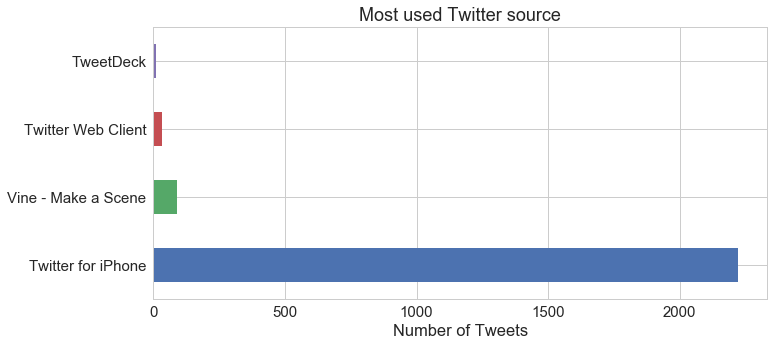

In [243]:
ted_clean['source'].value_counts().plot('barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

** Most tweets on we rate dogs were sent from Twitter for iphone **

In [244]:
# analyzing the breeds which most tweets were about
df_clean.dog_breed.value_counts().nlargest(10)

Unknown               305
golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
Name: dog_breed, dtype: int64

In [245]:
# out of the 10 most tweeted breeds, 305 were unidentified - Removing this from the analysis
df_clean.loc[df_clean['dog_breed'] == 'Unknown', 'dog_breed'] = None

In [246]:
# Number of observations used for analysis and visualizations
df_clean.dog_breed.count()

1666

In [247]:
# Check they have been removed
df_clean.dog_breed.value_counts().nlargest(10)

golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   48
Samoyed                42
Pomeranian             41
malamute               33
Name: dog_breed, dtype: int64

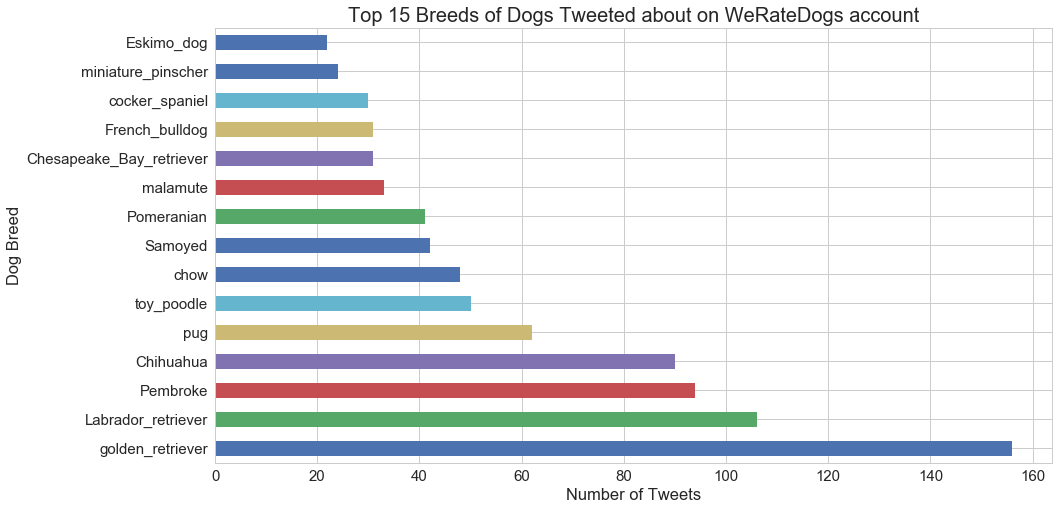

In [248]:
# Plot a horizontal bar chart to show top 15 breeds
fig = plt.figure(figsize=(15,8))
df_clean.groupby('dog_breed').count()['dog_score'].sort_values(ascending=False).nlargest(15).plot(kind='barh')
plt.title("Top 15 Breeds of Dogs Tweeted about on WeRateDogs account",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets"); 

** From the chart, we can see that the top five dogs tweeted about are the Golden Retriever, Labrador Retriever, Pembroke Welsh Corgi, Chihuahua and Pug. **

** The Golden retriever was tweeted about more than other breeds. This could mean that more people had golden retrievers **

In [249]:
# Looking at the ratings for each of the breeds
# Remembering to remove the 2 outliers we identified in the cleaning exercies and the ratings for the groups of dogs.
# We take only numerators ratings that fall between 0 to 14.
df_clean1 = df_clean[df_clean['dog_score'] <= 14] 

In [250]:
# Looking at the statistice for all breeds removing outliers and groups.
df_clean1['dog_score'].describe()

count    1958.000000
mean       10.540347
std         2.172235
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: dog_score, dtype: float64

In [251]:
# Grouping these scores by breed and take a look at some statistics.
df_clean1.groupby('dog_breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Afghan_hound,3.0,9.666667,5.773503,3.0,8.00,13.0,13.00,13.0
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Appenzeller,2.0,11.000000,2.828427,9.0,10.00,11.0,12.00,13.0
Australian_terrier,2.0,11.500000,2.121320,10.0,10.75,11.5,12.25,13.0
Bedlington_terrier,6.0,10.333333,3.141125,6.0,8.25,10.5,12.75,14.0
Bernese_mountain_dog,11.0,11.272727,1.103713,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0


In [252]:
# Let's look at the top scores by breed.
df_clean1.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(10)

dog_breed
Bouvier_des_Flandres    13.000000
Saluki                  12.500000
briard                  12.333333
Tibetan_mastiff         12.250000
Border_terrier          12.142857
standard_schnauzer      12.000000
silky_terrier           12.000000
Gordon_setter           11.750000
Irish_setter            11.750000
Samoyed                 11.690476
Name: dog_score, dtype: float64

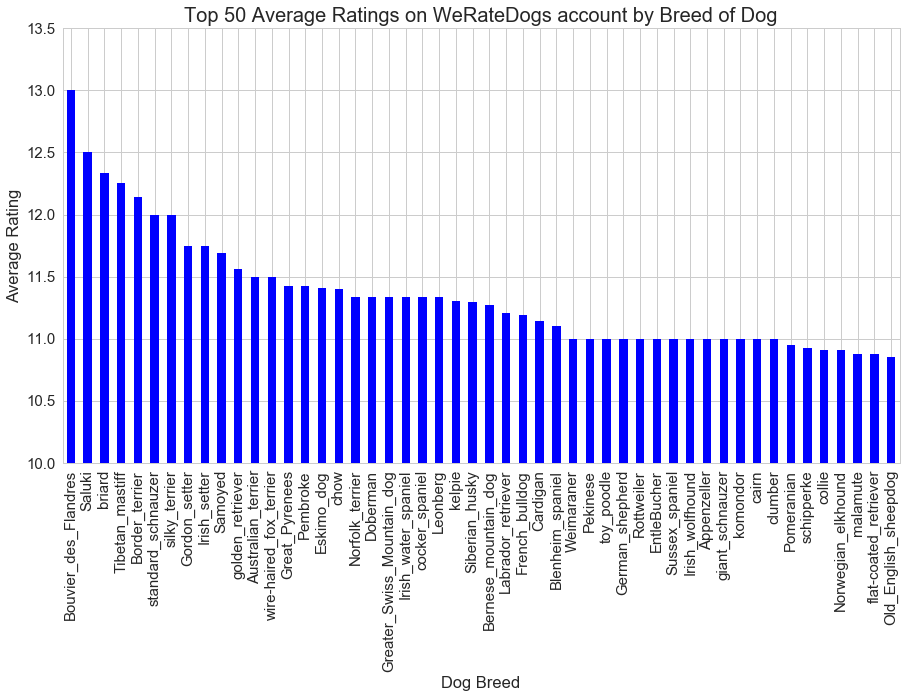

In [253]:
# Plot the top scores for the top 50 breeds on a standard bar chart
fig = plt.figure(figsize=(15,8))
df_clean1.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(50).plot(kind='bar',color='blue')
plt.title("Top 50 Average Ratings on WeRateDogs account by Breed of Dog",fontsize=20)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,13.5);

** Within the top 50 highest rated dogs, the Golden retriever had a postion of number 11 however this seems a little absurd as it was the dog mostly tweeted about achiving double number of tweets than any other dog **  


In [254]:
# To investigate futher if the above observation was an anomaly, we will now plot the top scores for the top 30 breeds on a standard bar chart
#Also, we Create a variable that includes dog breeds with more than 9 counts
count = df_clean['dog_breed'].value_counts()

In [255]:
# Create a new dataframe which includes only dog breeds with at least 10 ratings
df_clean2 = df_clean[df_clean['dog_breed'].isin(count[count > 9].index)]

In [256]:
# Check the dataframe
df_clean2

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,0.999091,NaN,NaN,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
4,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.825670,NaN,NaN,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg
6,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,None,11,10,None,toy_poodle,0.304175,NaN,NaN,https://twitter.com/dog_rates/status/667470559035432960/photo/1,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg
7,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,None,7,10,None,borzoi,0.852088,NaN,NaN,https://twitter.com/dog_rates/status/667491009379606528/photo/1,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg
8,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,Philippe,9,10,None,Chihuahua,0.143957,NaN,NaN,https://twitter.com/dog_rates/status/667495797102141441/photo/1,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg
9,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,Hall,11,10,None,Labrador_retriever,0.996709,NaN,NaN,https://twitter.com/dog_rates/status/667502640335572993/photo/1,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg
10,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,None,12,10,None,beagle,0.636169,NaN,NaN,https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg
11,667517642048163840,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s https://t.co/fh5KflzBR0,Dook,8,10,None,Italian_greyhound,0.125176,NaN,NaN,https://twitter.com/dog_rates/status/667517642048163840/photo/1,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg
13,667524857454854144,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,None,12,10,None,Chesapeake_Bay_retriever,0.088122,NaN,NaN,https://twitter.com/dog_rates/status/667524857454854144/photo/1,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg
14,667534815156183040,2015-11-20 02:47:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","This is Frank (pronounced ""Fronq""). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10 https://t.co/CpPxD28IpV",Frank,8,10,None,P

In [257]:
# Let's filter out the outliers and groups of dogs.
df_clean3 = df_clean2[df_clean2['dog_score'] <= 14]

In [258]:
# statistical summary for these breeds.
df_clean3.groupby('dog_breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Bernese_mountain_dog,11.0,11.272727,1.103713,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0
Boston_bull,12.0,9.416667,2.108784,5.0,8.75,10.0,11.00,12.0
Cardigan,21.0,11.142857,1.590148,7.0,10.00,11.0,12.00,13.0
Chesapeake_Bay_retriever,31.0,10.838710,1.439833,8.0,10.00,10.0,12.00,13.0
Chihuahua,90.0,10.533333,2.056505,3.0,10.00,11.0,12.00,14.0


In [259]:
# Loking again at the top scores by breed.
df_clean3.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(10)

dog_breed
Samoyed                 11.690476
golden_retriever        11.561290
Great_Pyrenees          11.428571
Pembroke                11.425532
Eskimo_dog              11.409091
chow                    11.404255
cocker_spaniel          11.333333
kelpie                  11.307692
Siberian_husky          11.300000
Bernese_mountain_dog    11.272727
Name: dog_score, dtype: float64

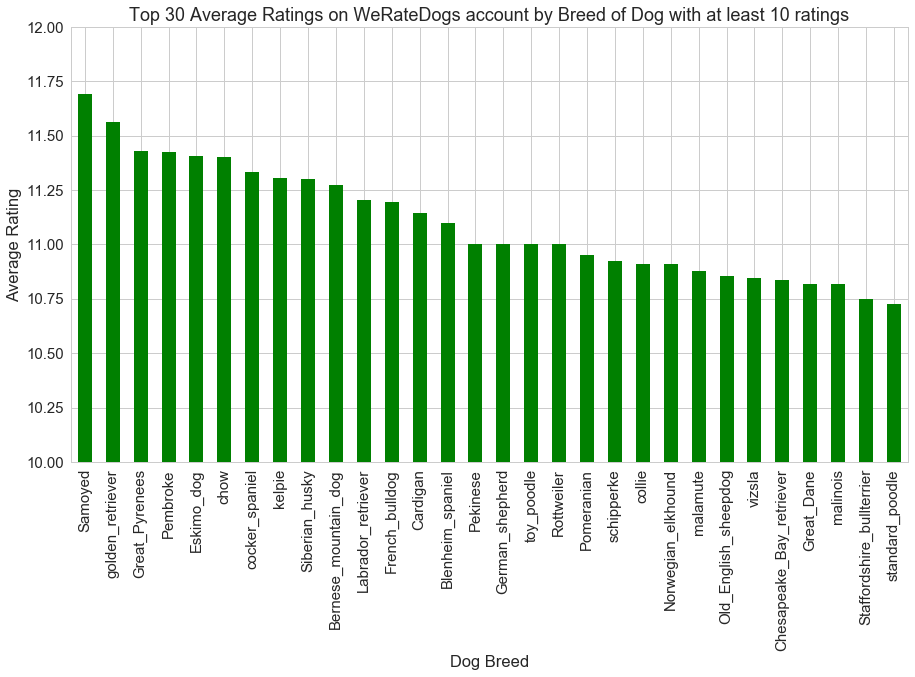

In [260]:
# plotting again the top scores for the top 30 breeds on a standard bar chart
fig = plt.figure(figsize=(15,8))
df_clean3.groupby('dog_breed')['dog_score'].mean().sort_values(ascending=False).nlargest(30).plot(kind='bar',color='green')
plt.title("Top 30 Average Ratings on WeRateDogs account by Breed of Dog with at least 10 ratings",fontsize=18)
plt.ylabel("Average Rating")
plt.xlabel("Dog Breed")
plt.ylim(10,12);

** The top rated breeds are Samoyed, Golden Retriever, Great Pyrenees, Pembroke Welsh Corgi and Eskimo Dog. **   
** The Golden Retriver and Pembroke Welsh Corgi appear in the original plot of 50 top breeds and this plot of 30. **   

In [261]:
# Looking at the most popular dog names
df_clean.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
0,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,Biden,7,10,None,Saint_Bernard,0.381377,NaN,NaN,https://twitter.com/dog_rates/status/667405339315146752/photo/1,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,0.999091,NaN,NaN,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
2,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,None,10,10,None,None,0.000000,NaN,NaN,https://twitter.com/dog_rates/status/667437278097252352/photo/1,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
3,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,None,6,10,None,None,0.000000,NaN,NaN,https://twitter.com/dog_rates/status/667443425659232256/photo/1,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
4,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.825670,NaN,NaN,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg


In [262]:
# Total number of names
df_clean['dog_name'].count()

1971

In [263]:
#Which dog names are mostly tweeted about on weratedogs
df_clean.dog_name.value_counts().nlargest(10)

None       622
Charlie     11
Lucy        10
Cooper      10
Oliver      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Toby         7
Name: dog_name, dtype: int64

In [264]:
# out of the 10 most tweeted dog names, 622 were unidentified - Removing this from the analysis
df_clean.loc[df_clean['dog_name'] == 'None', 'dog_name'] = None

In [265]:
# Number of observations used for analysis and visualizations
df_clean.dog_name.count()

1349

In [266]:
# Check they have been removed
df_clean.dog_name.value_counts().nlargest(10)

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Toby        7
Lola        7
Name: dog_name, dtype: int64

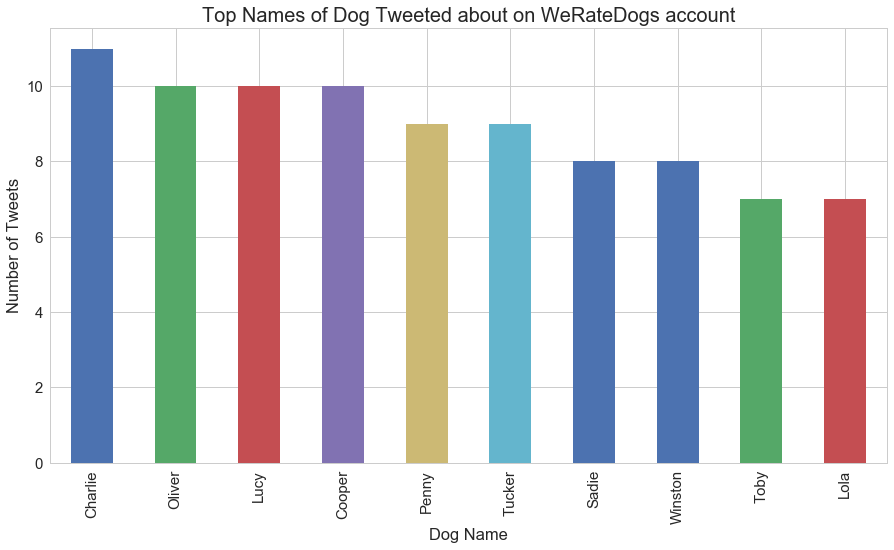

In [267]:
# Plot a horizontal bar chart to show top 10 dog names
fig = plt.figure(figsize=(15,8))
df_clean.groupby('dog_name').count()['dog_score'].sort_values(ascending=False).nlargest(10).plot(kind='bar')
plt.title("Top Names of Dog Tweeted about on WeRateDogs account",fontsize=20)
plt.ylabel("Number of Tweets")
plt.xlabel("Dog Name"); 

** Of all the names of dogs on the werate dogs account, Pinot, Dido & Bones were the most popular **

In [268]:
# Looking at the most popular dog names
df_clean.head()

,tweet_id,tweet_date,tweet_source,tweet_text,dog_name,dog_score,out_of,dog_type,dog_breed,probability_AI_calc,no_of_likes,retweet_count,tweet_url,image_link
0,667405339315146752,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,Biden,7,10,None,Saint_Bernard,0.381377,NaN,NaN,https://twitter.com/dog_rates/status/667405339315146752/photo/1,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg
1,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,None,12,10,None,Rottweiler,0.999091,NaN,NaN,https://twitter.com/dog_rates/status/667435689202614272/photo/1,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg
2,667437278097252352,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,None,10,10,None,None,0.000000,NaN,NaN,https://twitter.com/dog_rates/status/667437278097252352/photo/1,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg
3,667443425659232256,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,None,6,10,None,None,0.000000,NaN,NaN,https://twitter.com/dog_rates/status/667443425659232256/photo/1,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg
4,667453023279554560,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,Cupcake,11,10,None,Labrador_retriever,0.825670,NaN,NaN,https://twitter.com/dog_rates/status/667453023279554560/photo/1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg


In [269]:
# Total number of names
df_clean['dog_type'].count()

1971

In [270]:
#Which dog types(dog stages) were the most popular on weratedogs
df_clean.dog_type.value_counts().nlargest(5)

None       1668
pupper      209
doggo        63
puppo        23
floofer       8
Name: dog_type, dtype: int64

In [271]:
# There were 1668 tweets where the type was unidentified - lets remove these from the analysis
df_clean.loc[df_clean['dog_type'] == 'None', 'dog_type'] = None

In [272]:
# Number of observations used for analysis and visualizations
df_clean.dog_type.count()

303

In [273]:
# Check that they have been removed
df_clean.dog_type.value_counts().nlargest(5)

pupper     209
doggo       63
puppo       23
floofer      8
Name: dog_type, dtype: int64

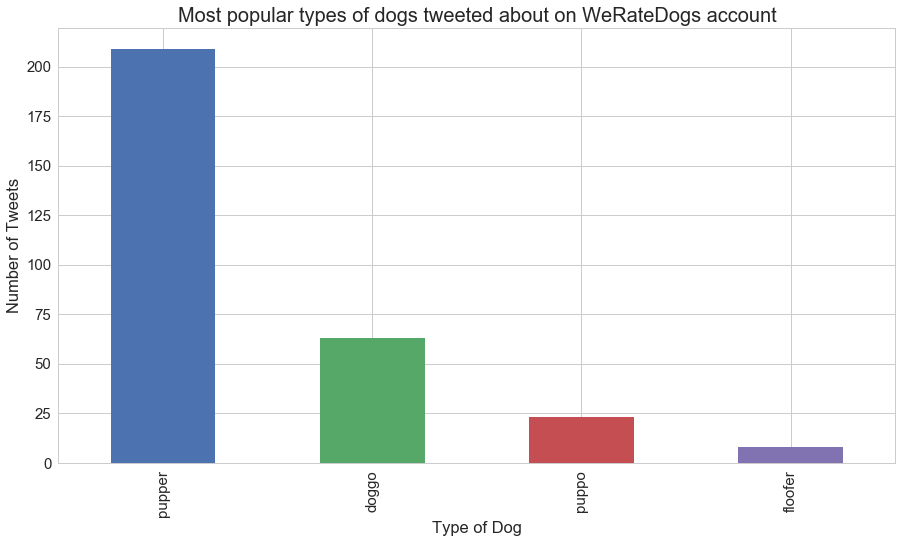

In [274]:
# Plot a horizontal bar chart for most popular dog types
fig = plt.figure(figsize=(15,8))
df_clean.groupby('dog_type').count()['dog_score'].sort_values(ascending=False).nlargest(5).plot(kind='bar')
plt.title("Most popular types of dogs tweeted about on WeRateDogs account",fontsize=20)
plt.ylabel("Number of Tweets")
plt.xlabel("Type of Dog"); 

** Pupper dog stage was the most popular types on werate dogs **

## References

https://stackoverflow.com/questions/24848925/how-to-install-tweepy-with-anacondas-and-easy-install
https://en.wikipedia.org/wiki/WeRateDogs
https://stackoverflow.com/questions/13806372/typeerror-function-object-has-no-attribute-getitem
https://pandas.pydata.org   
https://pypi.org/project/pylib/
http://www.karenbevis.com/weratedogs

